<a href="https://colab.research.google.com/github/soyab266/test/blob/master/polynominal_R_WITH_LR_ion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [4]:
df=pd.read_csv(path)


In [ ]:
df.head()

In [ ]:
df.describe()

In [8]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Text(0, 0.5, 'CO2EMISSIONS')

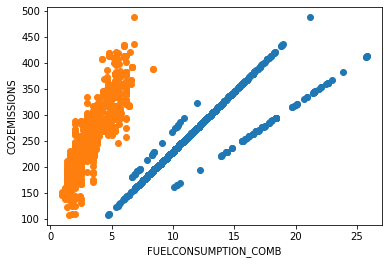

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

SCATTER PLOT

Text(0, 0.5, 'CO2EMISSIONS')

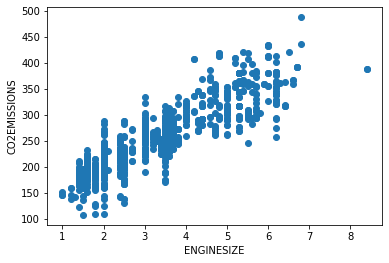

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [12]:
len(train)

845

In [13]:
len(test)

222

Text(0, 0.5, 'CO2EMISSIONS')

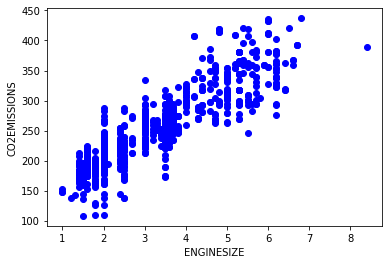

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [14]:
from numpy.ma.core import asanyarray
from numpy.ma.core import asanyarray

lr=linear_model.LinearRegression()
x_train=np.asanyarray(train[['ENGINESIZE']])
y_train=np.asanyarray(train[['CO2EMISSIONS']])
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[[39.24147442]]
[124.54311175]


Polynomial regression


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x_train=np.asanyarray(train[['ENGINESIZE']])
y_train=np.asanyarray(train[['CO2EMISSIONS']])
x_test=np.asanyarray(test[['ENGINESIZE']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])

In [32]:
poly = PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)

In [33]:
x_train_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [34]:
lr.fit(x_train_poly,y_train)

LinearRegression()

In [35]:
print(lr.coef_)


[[ 0.         51.40017871 -1.61324069]]


In [36]:
print(lr.intercept_)

[105.12135771]


Text(0, 0.5, 'Emission')

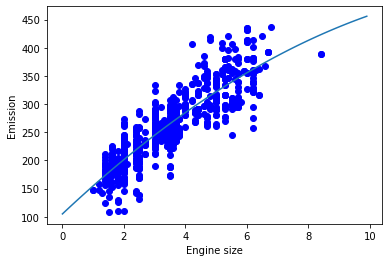

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)
plt.plot(xx,yy)
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [38]:
x_test_poly=poly.transform(x_test)
y_test1=lr.predict(x_test_poly)

In [39]:

print("R2-score: %.2f" % r2_score(y_test,y_test1 ) )

R2-score: 0.74


In [44]:
x_train=np.asanyarray(train[['ENGINESIZE']])
y_train=np.asanyarray(train[['CO2EMISSIONS']])
x_test=np.asanyarray(test[['ENGINESIZE']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_train_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [46]:
y_train1= lr.fit(x_train_poly, y_train)

In [47]:
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[ 0.         33.43695989  3.29303508 -0.40385069]]
Intercept:  [124.39213636]


Text(0, 0.5, 'Emission')

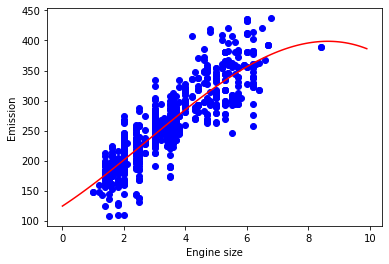

In [48]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)+lr.coef_[0][3]*np.power(XX,3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [52]:
x_test_poly = poly.transform(x_test)
y_test2 = lr.predict(x_test_poly)


In [54]:
print("R2-score: %.2f" % r2_score(y_test,y_test2 ) )

R2-score: 0.74


Text(0, 0.5, 'CO2EMISSIONS')

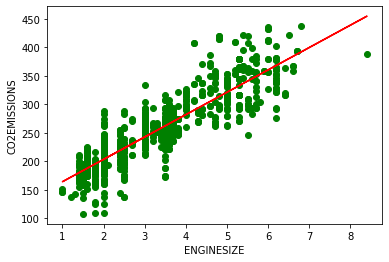

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='green')
plt.plot(x_train,lr.coef_* x_train +lr.intercept_,color='red')# yhat=theta0 + theta 1* x1
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

yhat=theta (0)+ theta (1)*x1//////
 theta(0)= intercept /////
 theta(1)= coef

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

In [ ]:
x_test=np.asanyarray(test[['ENGINESIZE']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])
# lr.fit(x_test,y_test)
y_test1= lr.predict(x_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test1 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test1 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_test1) )

Mean absolute error: 24.77
Residual sum of squares (MSE): 1010.78
R2-score: 0.75


In [ ]:
x_train=np.asanyarray(train[['FUELCONSUMPTION_COMB']])
y_train=np.asanyarray(train[['CO2EMISSIONS']])
x_test=np.asanyarray(test[['FUELCONSUMPTION_COMB']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_test2=lr.predict(x_test)

In [ ]:
y_test2

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test2 - y_test1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test2 - y_test1) ** 2))
print("R2-score: %.2f" % r2_score(y_test1 , y_test2) )

Mean absolute error: 25.62
Residual sum of squares (MSE): 1234.00
R2-score: 0.60
